In [1]:
library(faraway)

In [2]:
data(sat)

In [5]:
sat.lm <- lm(total ~ expend + salary + ratio + takers, sat)

In [6]:
summary(sat.lm)


Call:
lm(formula = total ~ expend + salary + ratio + takers, data = sat)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
expend         4.4626    10.5465   0.423    0.674    
salary         1.6379     2.3872   0.686    0.496    
ratio         -3.6242     3.2154  -1.127    0.266    
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


In [7]:
sat.lm.resid = resid(sat.lm)

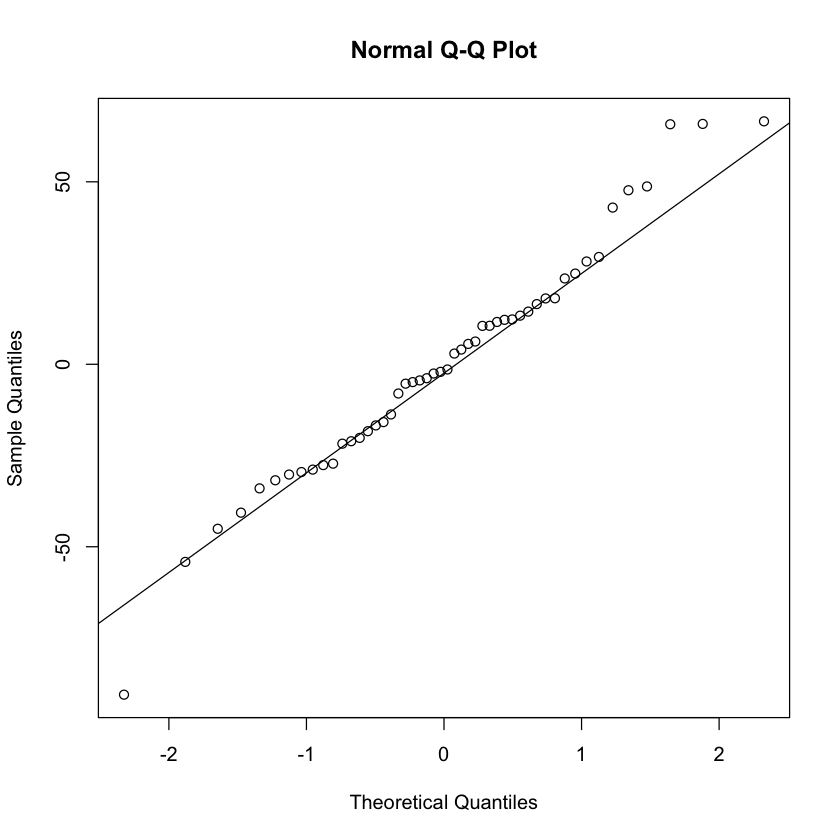

In [12]:
#sat.lm.resid
qqnorm(sat.lm.resid)
qqline(sat.lm.resid)

In [24]:
attach(sat)

The following objects are masked from sat (pos = 3):

    expend, math, ratio, salary, takers, total, verbal

The following objects are masked from sat (pos = 4):

    expend, math, ratio, salary, takers, total, verbal

The following objects are masked from sat (pos = 5):

    expend, math, ratio, salary, takers, total, verbal

The following objects are masked from sat (pos = 6):

    expend, math, ratio, salary, takers, total, verbal

The following objects are masked from sat (pos = 7):

    expend, math, ratio, salary, takers, total, verbal

The following objects are masked from sat (pos = 8):

    expend, math, ratio, salary, takers, total, verbal

The following objects are masked from sat (pos = 9):

    expend, math, ratio, salary, takers, total, verbal

The following objects are masked from sat (pos = 10):

    expend, math, ratio, salary, takers, total, verbal



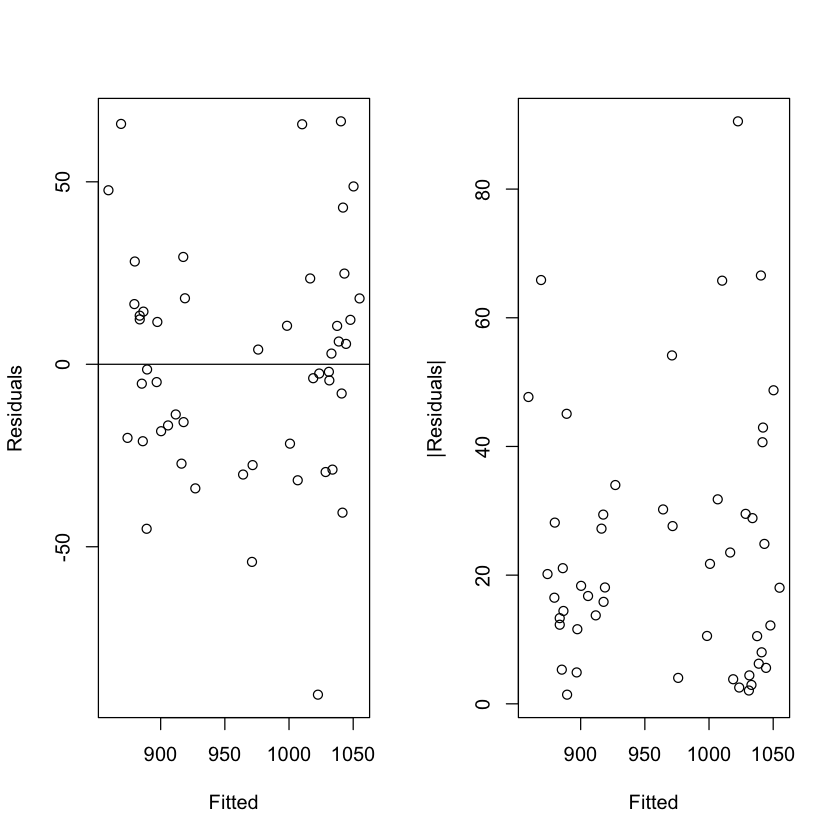

In [33]:
par(mfrow = c(1,2))
plot(fitted(sat.lm),residuals(sat.lm),xlab = "Fitted",ylab = "Residuals")
abline(h=0)
plot(fitted(sat.lm),abs(residuals(sat.lm)),xlab = "Fitted", ylab = "|Residuals|")

In [36]:
summary(lm(abs(residuals(sat.lm)) ~ fitted(sat.lm)))


Call:
lm(formula = abs(residuals(sat.lm)) ~ fitted(sat.lm))

Residuals:
    Min      1Q  Median      3Q     Max 
-22.827 -14.323  -5.001   6.204  65.754 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)
(Intercept)    10.60384   40.82315   0.260    0.796
fitted(sat.lm)  0.01386    0.04216   0.329    0.744

Residual standard error: 20.05 on 48 degrees of freedom
Multiple R-squared:  0.002247,	Adjusted R-squared:  -0.01854 
F-statistic: 0.1081 on 1 and 48 DF,  p-value: 0.7438


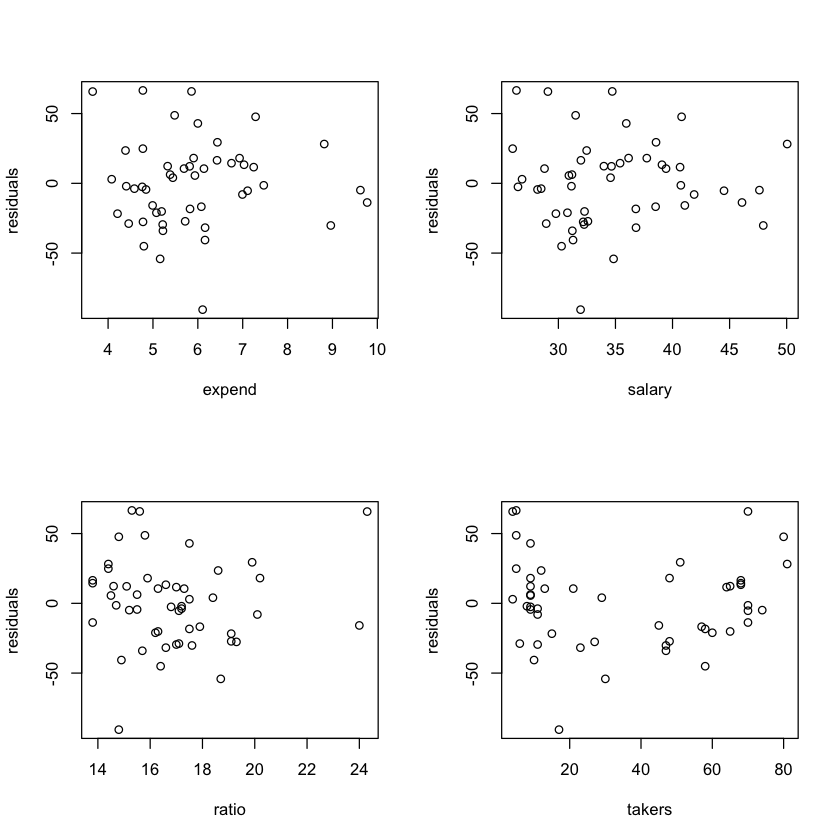

In [54]:
par(mfrow = c(2,2))
plot(expend, sat.lm.resid, xlab = "expend", ylab = "residuals")
plot(salary, sat.lm.resid, xlab = "salary", ylab = "residuals")
plot(ratio, sat.lm.resid, xlab = "ratio", ylab = "residuals")
plot(takers, sat.lm.resid, xlab = "takers", ylab = "residuals")

In [61]:
trans.lm <- lm(total ~ expend + salary + ratio + sqrt(takers), sat)

In [64]:
residual = trans.lm$residuals

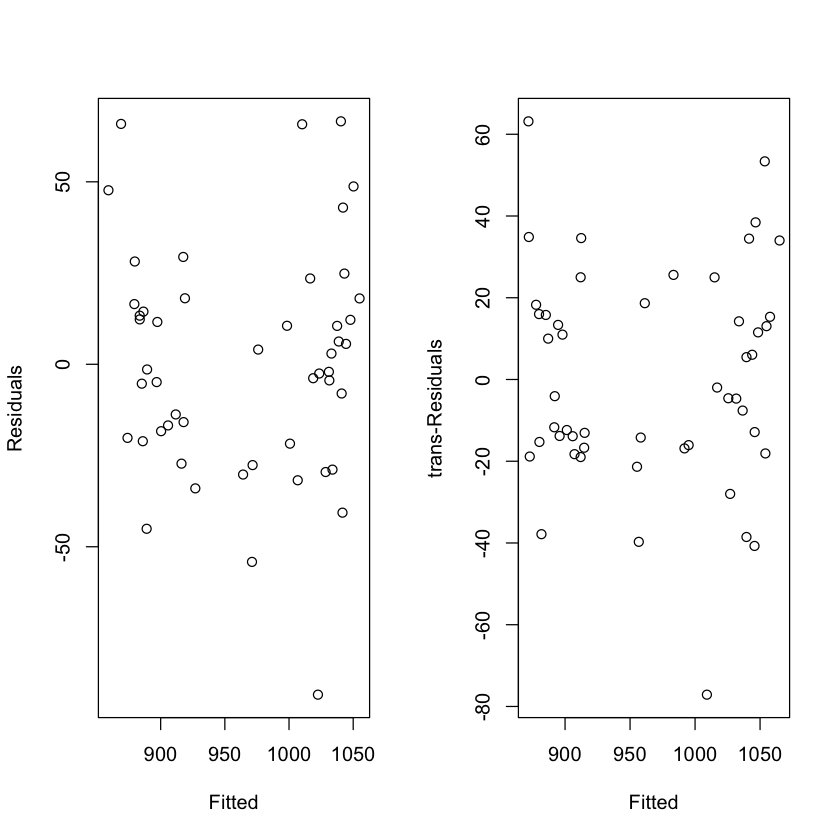

In [62]:
par(mfrow = c(1,2))
plot(fitted(sat.lm),residuals(sat.lm),xlab = "Fitted",ylab = "Residuals")
plot(fitted(trans.lm),residuals(trans.lm),xlab = "Fitted",ylab = "trans-Residuals")

In [65]:
shapiro.test(residual)


	Shapiro-Wilk normality test

data:  residual
W = 0.97524, p-value = 0.3728


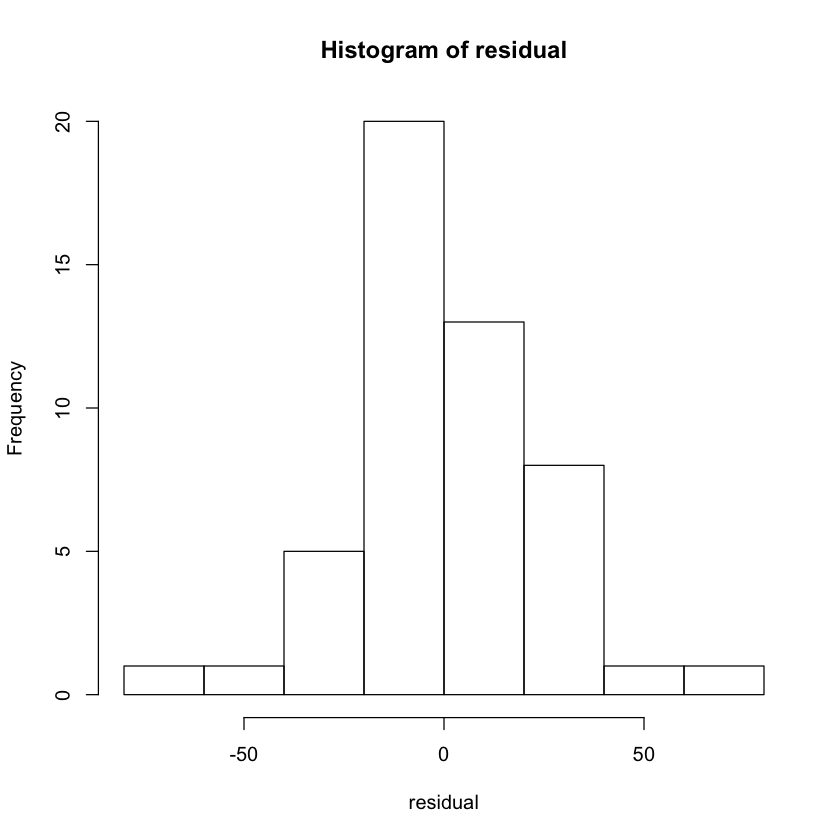

In [66]:
hist(residual)

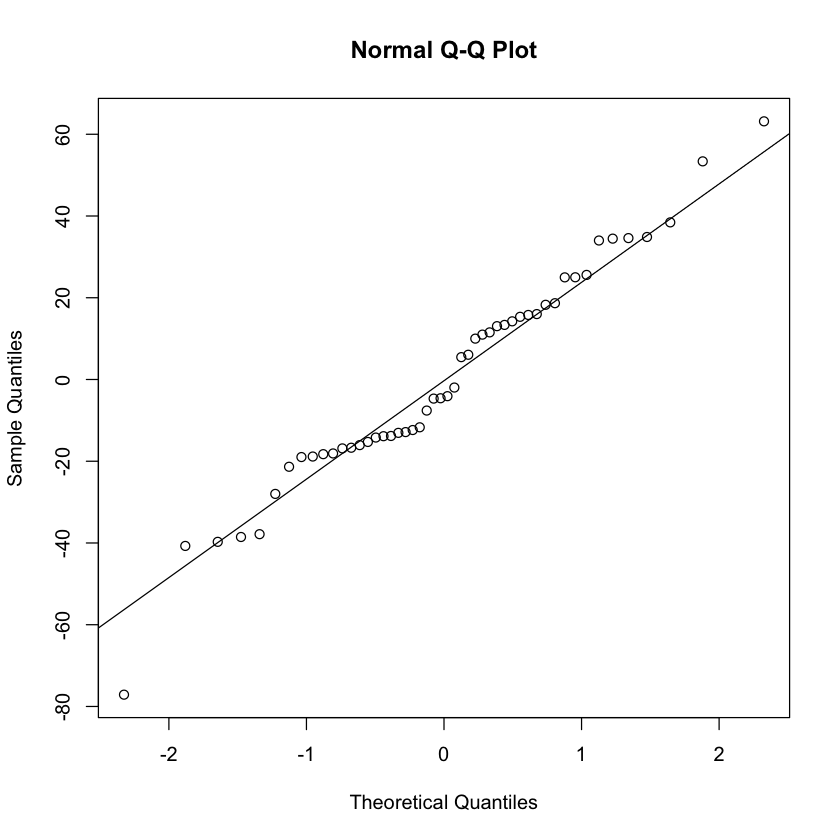

In [67]:
qqnorm(residual)
qqline(residual)

In [71]:
lev <- hatvalues(trans.lm)
lev_mean <- mean(lev)
lev[lev > 2*lev_mean]

California Connecticut  New Jersey        Utah 
  0.2826309   0.2291059   0.2221710   0.2917164

In [82]:
sresidual <- rstudent(trans.lm)
n <- length(sresidual)
p <- length(trans.lm$coefficients)
df <- n-p-1
alpha <- 0.05

In [92]:
range(sresidual)


[1] -3.137108  2.511031

In [96]:
#without bonferroni
thres <- qt(1-(0.05/2), df)
sresidual[abs(sresidual) > thres]

New Hampshire  North Dakota West Virginia 
     2.511031      2.090801     -3.137108

In [97]:
#without bonferroni
thres <- qt(1-(0.05/2)/n, df)
sresidual[abs(sresidual) > thres]

named numeric(0)

In [95]:
thres

[1] 2.015368